In [1]:
!pip install -r requirements.txt

In [2]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px





In [3]:
data = pd.read_csv('output/twitter_tweets_20241130_133358.csv')

In [4]:
data.head()

,Tweet_id,User_name,Tweet_text,Language,Hashtags,Created_at,Search_Keyword
0,1853729719239233937,Elon Musk (Parody),Would you buy a Tesla phone?\n\nCheaper and be...,en,[],2024-11-05 09:23:00+00:00,Tesla
1,1862546527144603906,Ken Synopsis & Vancouver Real Estate,Optimus is going to be wild https://t.co/cDI6b...,en,[],2024-11-29 17:17:51+00:00,Tesla
2,1862169330286280855,Elon Musk (Parody),Should Tesla make a phone?\n\nBetter than Ipho...,en,[],2024-11-28 16:19:00+00:00,Tesla
3,1862166333234012621,Tesla,Happy Thanksgiving from our family to yours! h...,en,[],2024-11-28 16:07:05+00:00,Tesla
4,1861920164767490060,Elon Musk (Parody),What do you think of this Tesla concept?\n\nWo...,en,[],2024-11-27 23:48:54+00:00,Tesla


DataFrame Overview:
--------------------------------------------------

1. DataFrame Shape:
Total Rows: 180
Total Columns: 10

2. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Tweet_id        180 non-null    int64              
 1   User_name       180 non-null    object             
 2   Tweet_text      180 non-null    object             
 3   Language        180 non-null    object             
 4   Hashtags        180 non-null    object             
 5   Created_at      180 non-null    datetime64[ns, UTC]
 6   Search_Keyword  180 non-null    object             
 7   Hashtag_Count   180 non-null    int64              
 8   Tweet_Length    180 non-null    int64              
 9   Word_Count      180 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory us


Hashtag Analysis:
--------------------------------------------------

Hashtag Statistics:
count    180.000000
mean       0.111111
std        0.537830
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Hashtag_Count, dtype: float64


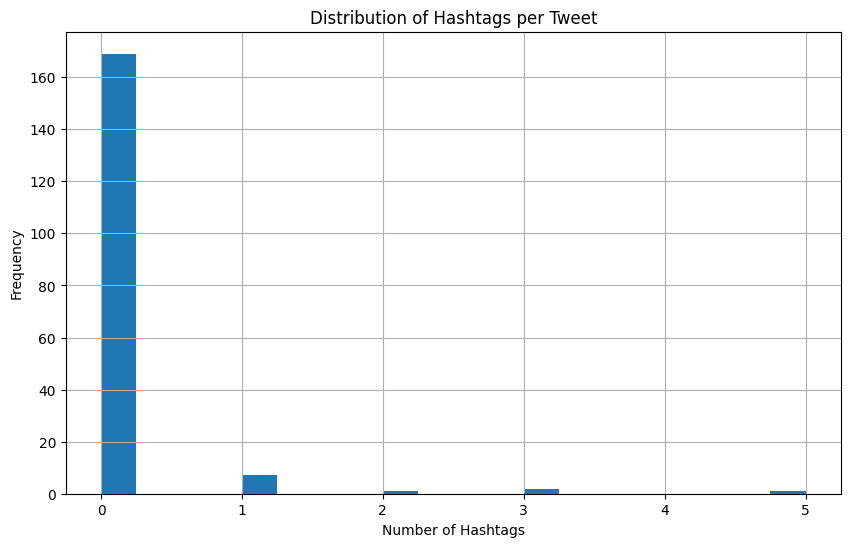


Keyword Analysis:
--------------------------------------------------

Search Keywords:
Search_Keyword
CyberTruck       56
Tesla            48
Tesla Model Y    44
Tesla Model 3    32
Name: count, dtype: int64



Text Analysis:
--------------------------------------------------

Tweet Length Statistics:
count     180.000000
mean      192.900000
std       240.394534
min        20.000000
25%        77.000000
50%       130.500000
75%       242.250000
max      2032.000000
Name: Tweet_Length, dtype: float64


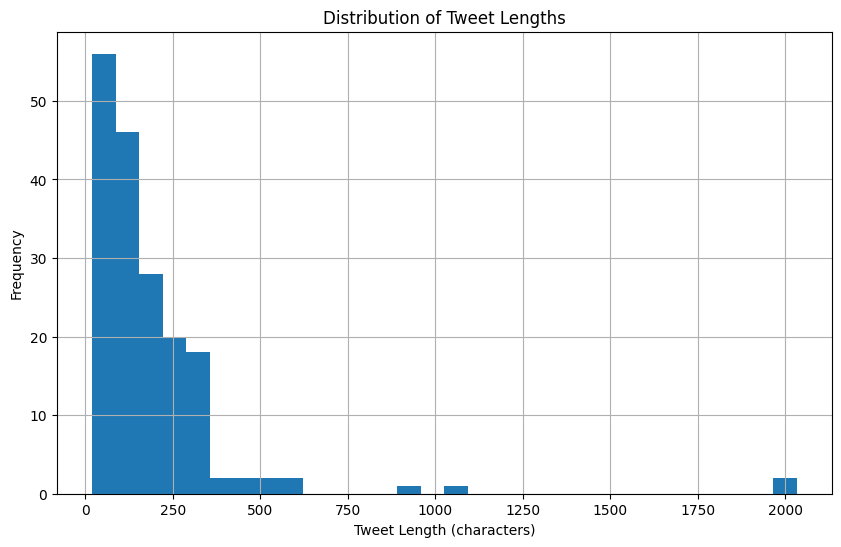


Word Count Statistics:
count    180.000000
mean      31.394444
std       44.481557
min        3.000000
25%       11.000000
50%       20.000000
75%       39.250000
max      401.000000
Name: Word_Count, dtype: float64


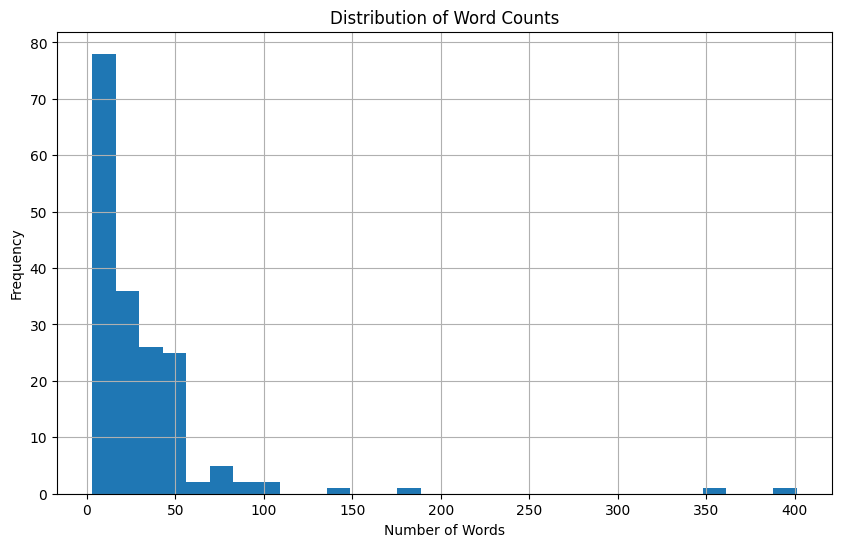


Word Frequency Analysis:
--------------------------------------------------


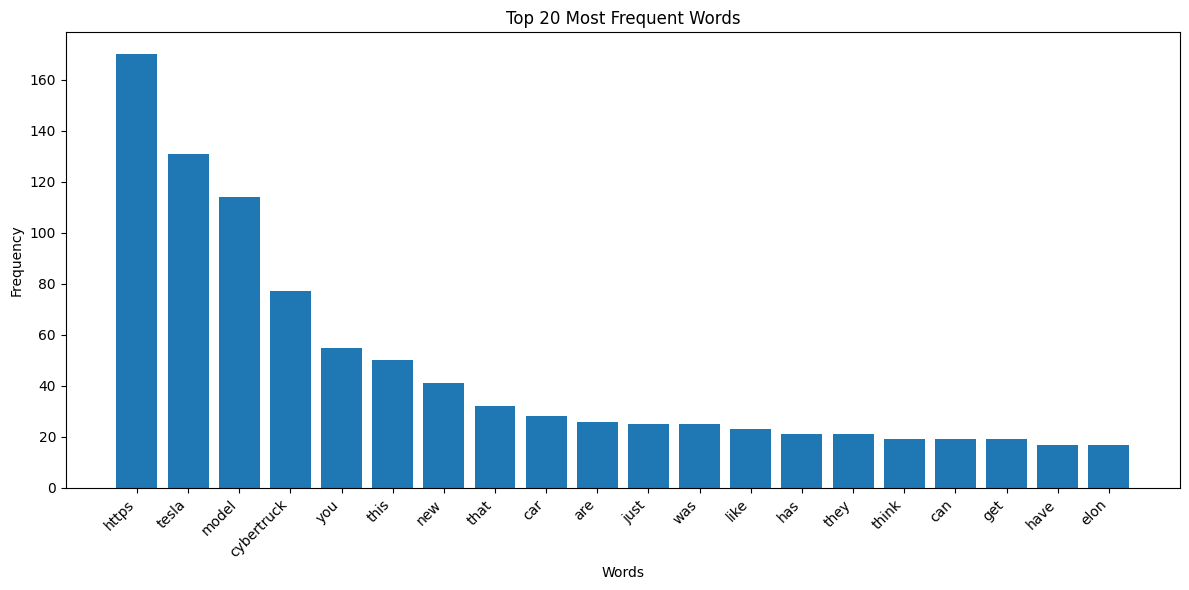


Top 20 Most Frequent Words:
https: 170
tesla: 131
model: 114
cybertruck: 77
you: 55
this: 50
new: 41
that: 32
car: 28
are: 26
just: 25
was: 25
like: 23
has: 21
they: 21
think: 19
can: 19
get: 19
have: 17
elon: 17


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


# Basic Overview
def basic_eda(data):
    print("DataFrame Overview:")
    print("-" * 50)
    
    # Basic Information
    print("\n1. DataFrame Shape:")
    print(f"Total Rows: {data.shape[0]}")
    print(f"Total Columns: {data.shape[1]}")
    
    print("\n2. Column Information:")
    print(data.info())
    
    print("\n3. Missing Values:")
    print(data.isnull().sum())
    
    print("\n4. Basic Statistics for Numeric Columns:")
    print(data.describe())


# User Analysis
def user_analysis(data):
    print("\nUser Analysis:")
    print("-" * 50)
    
    # Top Users
    top_users = data['User_name'].value_counts().head(10)
    print("\nTop 10 Users:")
    print(top_users)
    
    # Plotly Bar Chart for Top Users
    fig = px.bar(
        x=top_users.index, 
        y=top_users.values, 
        title='Top 10 Users by Tweet Count',
        labels={'x': 'User', 'y': 'Number of Tweets'}
    )
    fig.show()


# Hashtag Analysis
def hashtag_analysis(data):
    # Extract and flatten hashtags
    data['Hashtag_Count'] = data['Hashtags'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
    
    print("\nHashtag Analysis:")
    print("-" * 50)
    
    print("\nHashtag Statistics:")
    print(data['Hashtag_Count'].describe())
    
    # Histogram of Hashtag Counts
    plt.figure(figsize=(10, 6))
    data['Hashtag_Count'].hist(bins=20)
    plt.title('Distribution of Hashtags per Tweet')
    plt.xlabel('Number of Hashtags')
    plt.ylabel('Frequency')
    plt.show()


# Keyword Analysis
def keyword_analysis(data):
    print("\nKeyword Analysis:")
    print("-" * 50)
    
    keyword_counts = data['Search_Keyword'].value_counts()
    print("\nSearch Keywords:")
    print(keyword_counts)
    
    # Pie Chart of Keywords
    fig = px.pie(
        names=keyword_counts.index, 
        values=keyword_counts.values, 
        title='Search Keywords Distribution'
    )
    fig.show()


# Text Analysis
def text_analysis(data):
    print("\nText Analysis:")
    print("-" * 50)
    
    # Tweet Length Analysis
    data['Tweet_Length'] = data['Tweet_text'].str.len()
    
    print("\nTweet Length Statistics:")
    print(data['Tweet_Length'].describe())
    
    # Histogram of Tweet Lengths
    plt.figure(figsize=(10, 6))
    data['Tweet_Length'].hist(bins=30)
    plt.title('Distribution of Tweet Lengths')
    plt.xlabel('Tweet Length (characters)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Word Count Analysis
    data['Word_Count'] = data['Tweet_text'].str.split().str.len()
    
    print("\nWord Count Statistics:")
    print(data['Word_Count'].describe())
    
    # Histogram of Word Counts
    plt.figure(figsize=(10, 6))
    data['Word_Count'].hist(bins=30)
    plt.title('Distribution of Word Counts')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()


# Word Frequency Analysis
def word_frequency_analysis(data):
    print("\nWord Frequency Analysis:")
    print("-" * 50)
    
    # Combine all tweets
    all_tweets = ' '.join(data['Tweet_text'])
    
    # Basic word frequency
    from collections import Counter
    import re
    
    # Clean and tokenize
    words = re.findall(r'\w+', all_tweets.lower())
    
    # Remove very common words
    stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Count and display top words
    word_freq = Counter(words).most_common(20)
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    words, counts = zip(*word_freq)
    plt.bar(words, counts)
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print word frequencies
    print("\nTop 20 Most Frequent Words:")
    for word, count in word_freq:
        print(f"{word}: {count}")


# Main Execution
def main_eda(data):
    basic_eda(data)
    user_analysis(data)
    hashtag_analysis(data)
    keyword_analysis(data)
    text_analysis(data)
    word_frequency_analysis(data)


# Run the EDA
main_eda(data)